# Gaussian Mixture Model
Not a model per se, but rather a probability distribution.
- a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

**Source Code Referencse**
- Chelsea Pelleriti (2020) CPSC 392 || Lecture 17 Pt. II EM/Gaussian Mixture Models in Python https://www.youtube.com/watch?v=WsGNJYCxwNM&ab_channel=ChelseaPelleriti

In [24]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings(action="ignore")

# Z-score variables
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [25]:
bk = pd.read_csv("burger-king-items.txt", sep="\t")
bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


In [26]:
features = ["Calories", "Sodium(mg)"]

X = bk[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=3)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
# Hard assignment (labels of clusters to which each data point belongs to.)
# There are 3 components (0, 1, 2) as was previously set in the GM model initialisation above.
cluster = EM.predict(X)
cluster

array([1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# Soft assignment (gives probabilities)
cluster_p = EM.predict_proba(X)
cluster_p

array([[3.97538607e-01, 5.95331255e-01, 7.13013825e-03],
       [9.46507973e-01, 3.02126633e-02, 2.32793634e-02],
       [2.80131203e-01, 7.10765877e-01, 9.10291990e-03],
       [9.10765045e-01, 2.22980121e-03, 8.70051542e-02],
       [7.98766536e-01, 1.57325779e-01, 4.39076849e-02],
       [5.71727640e-01, 4.13176953e-01, 1.50954070e-02],
       [9.67313775e-01, 4.10616191e-03, 2.85800629e-02],
       [7.68702035e-01, 4.17842920e-05, 2.31256181e-01],
       [3.75534858e-01, 1.27280128e-02, 6.11737129e-01],
       [5.42250069e-04, 1.14189658e-05, 9.99446331e-01],
       [1.74916883e-08, 1.80139264e-09, 9.99999981e-01],
       [1.99899137e-25, 8.70202252e-08, 9.99999913e-01],
       [1.88998264e-03, 1.19457458e-01, 8.78652559e-01],
       [8.94577124e-04, 2.67653701e-03, 9.96428886e-01],
       [1.12095737e-11, 1.97493989e-03, 9.98025060e-01],
       [1.64682094e-12, 5.00633940e-04, 9.99499366e-01],
       [8.11476071e-24, 2.53866688e-07, 9.99999746e-01],
       [6.53431189e-08, 9.42410

In [29]:
print("SILHOUETTE: ", silhouette_score(X, cluster))

SILHOUETTE:  0.3365177677346481


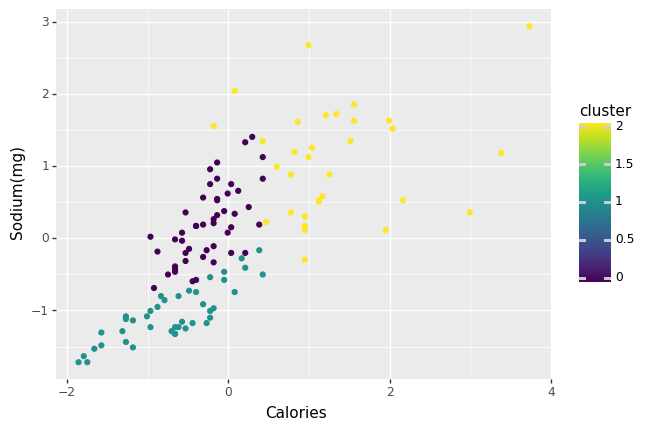

<ggplot: (8774496177189)>

In [30]:
# K-Means clustering assumes that the clusters take the shape of clusters (round in shape).
# In GMM, however, the clusters could be nuanced, which is why it is used.
# (For one, clusters are not always spherical, for two, we also want to use the soft assignment instead of the hard assignment.)

X["cluster"] = cluster

(ggplot(X, aes(x="Calories", y="Sodium(mg)", color="cluster")) + geom_point())

## Multiple Dimensions

In [31]:
features = ["Sugar(g)", "Protein(g)", "Fat(g)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)
X[features]

,Sugar(g),Protein(g),Fat(g)
0,-0.326804,-0.370060,-0.919796
1,-0.326804,-0.145073,-0.670844
2,-0.326804,0.304900,-0.421892
3,-0.326804,0.604882,0.076012
4,-0.326804,0.454891,-0.172940
...,...,...,...
117,0.166434,-0.670042,-1.542176
118,1.235119,-0.745038,-1.386581
119,3.125868,-0.745038,-0.857558
120,3.947933,-0.745038,-0.857558


In [32]:
EM = GaussianMixture(n_components=3)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
cluster = EM.predict(X)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [34]:
silhouette_score(X, cluster)

0.41269446652563374

In [35]:
EM.predict_proba(X)

array([[9.99999415e-001, 6.61610659e-023, 5.85130020e-007],
       [9.99999998e-001, 9.54619426e-019, 2.08090892e-009],
       [1.00000000e+000, 8.26491593e-024, 5.65851237e-017],
       [1.00000000e+000, 1.10138989e-010, 4.07225869e-021],
       [1.00000000e+000, 1.54584050e-016, 5.71032883e-019],
       [9.99999739e-001, 2.28985615e-017, 2.60794614e-007],
       [1.00000000e+000, 3.23093253e-018, 1.78783299e-011],
       [1.00000000e+000, 2.94114465e-014, 1.86268166e-029],
       [9.75402027e-001, 2.45979727e-002, 7.97298032e-025],
       [1.46256290e-001, 8.53743710e-001, 4.75716633e-051],
       [1.10827980e-003, 9.98891720e-001, 1.44028577e-095],
       [2.42696410e-006, 9.99997573e-001, 3.48854951e-138],
       [4.20932548e-001, 5.79067452e-001, 3.88876052e-018],
       [4.83532124e-001, 5.16467876e-001, 7.84132485e-021],
       [2.97697682e-002, 9.70230232e-001, 2.05227689e-058],
       [1.05952940e-002, 9.89404706e-001, 3.90622426e-066],
       [1.05599883e-005, 9.99989440e-001

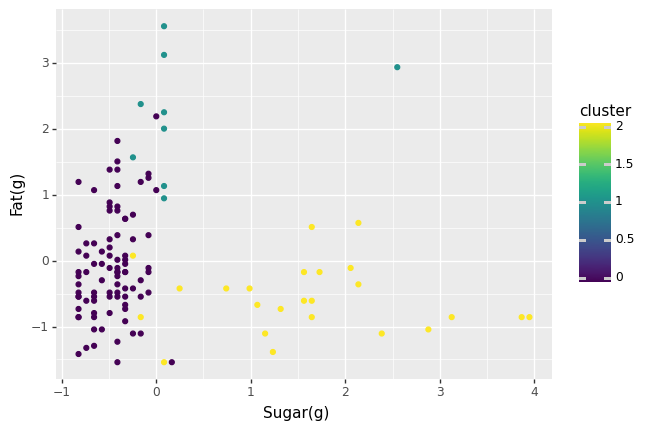

<ggplot: (8774496566173)>

In [36]:
X["cluster"] = cluster
(ggplot(X, aes(x="Sugar(g)", y="Fat(g)", color="cluster")) + geom_point)

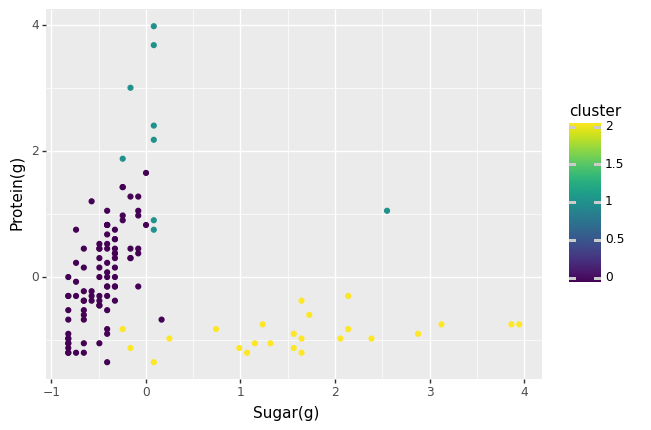

<ggplot: (8774496116361)>

In [37]:
(ggplot(X, aes(x="Sugar(g)", y="Protein(g)", color="cluster")) + geom_point())

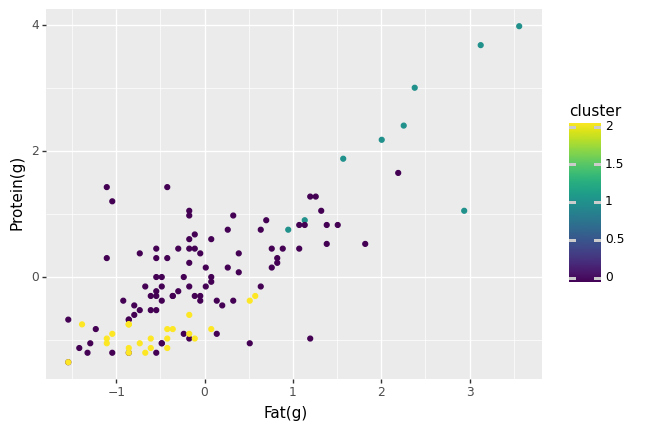

<ggplot: (8774496097937)>

In [38]:
(ggplot(X, aes(x="Fat(g)", y="Protein(g)", color="cluster")) + geom_point())